In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ast
import math
from advisor_client.client import *
client = AdvisorClient()

In [2]:
# get study
study_name = "optimal_jump1"
study = client.get_study_by_name(study_name)
print(study)

Id: 1, name: optimal_jump1, study_configuration: {"randomInitTrials": 10, "params": [{"parameterName": "jump_a", "type": "DOUBLE", "maxValue": 5.0, "minValue": -5.0}, {"parameterName": "jump_b", "type": "DOUBLE", "maxValue": 5.0, "minValue": -5.0}, {"parameterName": "jump_c", "type": "DOUBLE", "maxValue": 5.0, "minValue": -5.0}, {"parameterName": "jump_d", "type": "DOUBLE", "maxValue": 5.0, "minValue": 0}, {"parameterName": "opt_vel", "type": "DOUBLE", "maxValue": 6.0, "minValue": 3.0}], "goal": "MINIMIZE"}, algorithm: BayesianOptimization


('Is study done:', False)


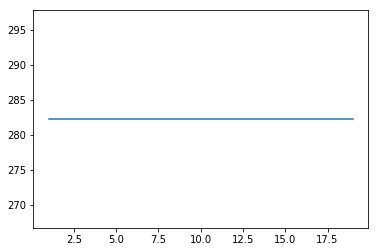

best trial: Id: 3, study_name: optimal_jump1, name: RandomSearchTrial, parameter_values: {"opt_vel": 5.616975330027352, "jump_d": 3.5720977797536175, "jump_c": 1.7146143998777532, "jump_b": 2.3926192197122607, "jump_a": 3.0576856363908895}, objective_value: 282.224085665


In [5]:
# plot training curve
train_curve = []
print("Is study done:",client.is_study_done(study_name))
trials = client.list_trials(study_name)
for trial in trials:
    trial_metrics = client.list_trial_metrics(study_name,trial.id)
    for metrics in trial_metrics:
        train_curve.append(metrics.objective_value)
train_curve = np.clip(np.array(train_curve),0,500)
plt.plot(range(1,len(train_curve)+1),train_curve)
plt.show()
best_trial = client.get_best_trial(study_name)
print("best trial: {}".format(best_trial))

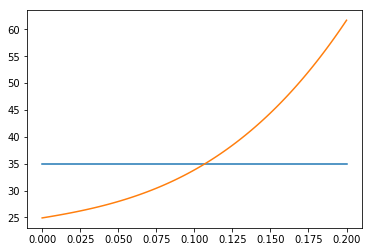

{'opt_vel': 3.6603814657395706, 'jump_d': 2.4904708938520805, 'jump_c': 2.5595392284494807, 'jump_b': 1.7908297027768274, 'jump_a': 4.585063581642734}


In [32]:
param_dic = ast.literal_eval(best_trial.parameter_values)
a = param_dic["jump_a"]
b = param_dic["jump_b"]
c = param_dic["jump_c"]
d = param_dic["jump_d"]
t = np.linspace(0,0.2,100)
y_constant = 35*np.ones_like(t)
y_poly = (10*a * t + 100*b * t ** 2 + 1000*c * t ** 3 + 10*d)
plt.plot(t,y_constant)
plt.plot(t,y_poly)
plt.show()
print(param_dic)

In [40]:
with open("../controllers/my_controller_python/args.txt",'w') as f1:
    f1.write(str(param_dic))
os.system('webots --mode=run')
with open("../controllers/my_controller_python/metrics.txt",'r') as f2:
    metrics_dic = eval(f2.read())
    y = metrics_dic["jump_metrics"]
print("objective_value:"，y)

46.8116151901
